
Create a binary classification problem using sklearn.datasets.make moons. Build a SVM classifier model and investigate the effect of hyper-parameters C, $\gamma$, and kernels on the model performance.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
# from sklearn import svm
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_moons


In [48]:
X, y = make_moons(n_samples = 2500,   #data observations to use
                  noise = 0.20,   
                  random_state=42)

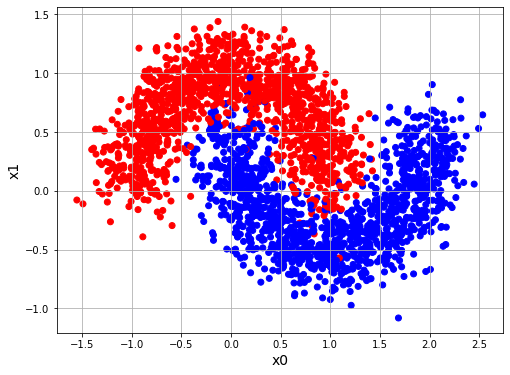

In [49]:
colors = ["red" if label == 0 else "blue" for label in y]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color = colors)
plt.xlabel("x0", fontsize = 14)
plt.ylabel("x1", fontsize=14)
plt.grid();   #bniary classifiation problem

We can see from the 2-dimensional scatter plot that the classes are not linearly seperable.  

In [50]:
X

array([[ 0.18328244, -0.00875828],
       [-0.95207625,  0.7416726 ],
       [-1.1361659 ,  0.67581293],
       ...,
       [-0.80860047,  0.65764085],
       [-0.27465711, -0.26101857],
       [-0.50971374,  0.85427502]])

In [51]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [53]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)  #fitted on training data 
                                # scaling on training.
     # z scores
X_test_scaled = scaler.transform(X_test) # z scores

In [54]:
model1 = svm.SVC(kernel="poly", C=10, gamma='scale')
#model1 = SVC(kernel="poly", C=2000, gamma='scale')
model1.fit(X_train_scaled, y_train)

SVC(C=10, kernel='poly')

In [55]:
y_pred_train = model1.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.8697142857142857

In [56]:
y_pred_test = model1.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

0.8826666666666667

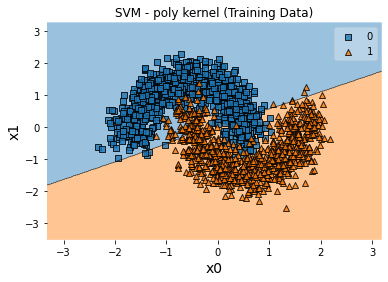

In [57]:
plot_decision_regions(X_train_scaled, y_train, clf = model1)
plt.xlabel("x0", fontsize = 14)
plt.ylabel("x1", fontsize = 14)
plt.title('SVM - poly kernel (Training Data)');

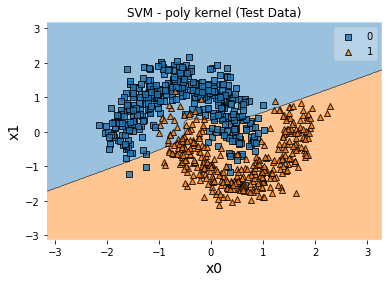

In [58]:
plot_decision_regions(X_test_scaled, y_test, clf = model1)
plt.xlabel("x0", fontsize = 14)
plt.ylabel("x1", fontsize = 14)
plt.title('SVM - poly kernel (Test Data)');

We have a decent model. The accuracy of the training error is slighly less than the test error. 

In [82]:
model2 = svm.SVC(kernel="linear", C=10, gamma=100)
model2.fit(X_train_scaled, y_train)

SVC(C=10, gamma=100, kernel='linear')

In [83]:
y_pred_train = model2.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.8645714285714285

In [84]:
y_pred_test = model2.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

0.8773333333333333

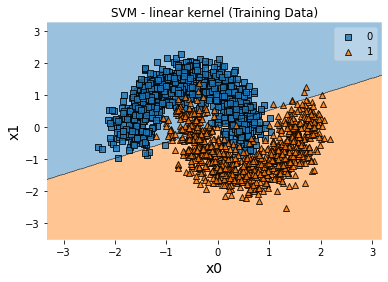

In [85]:
plot_decision_regions(X_train_scaled, y_train, clf = model2)
plt.xlabel("x0", fontsize = 14)
plt.ylabel("x1", fontsize = 14)
plt.title('SVM - linear kernel (Training Data)');


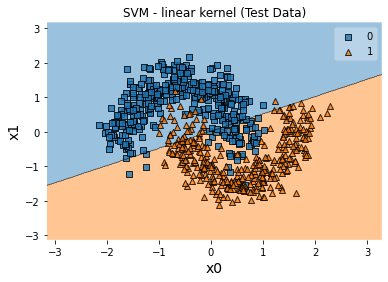

In [86]:
plot_decision_regions(X_test_scaled, y_test, clf = model2)
plt.xlabel("x0", fontsize = 14)
plt.ylabel("x1", fontsize = 14)
plt.title('SVM - linear kernel (Test Data)'); 


The linear kernel also works well for this data. It gives around the same accuracy as when setting the kernel to poly. 

In [87]:
model3 = svm.SVC(kernel="rbf", C=2, gamma=25)
#model3 = SVC(kernel="rbf", C=2500, gamma='scale')
model3.fit(X_train_scaled, y_train)

SVC(C=2, gamma=25)

In [88]:
y_pred_train = model3.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.9765714285714285

In [89]:
y_pred_test = model3.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

0.9626666666666667

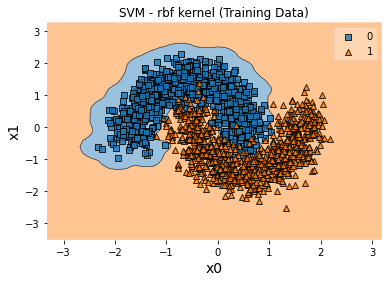

In [90]:
plot_decision_regions(X_train_scaled, y_train, clf = model3)
plt.xlabel("x0", fontsize = 14)
plt.ylabel("x1", fontsize = 14)
plt.title('SVM - rbf kernel (Training Data)');

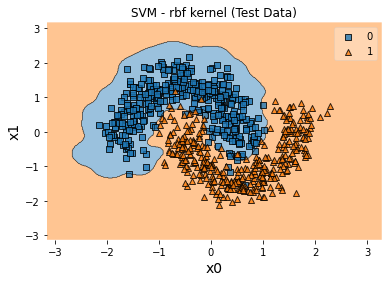

In [91]:
plot_decision_regions(X_test_scaled, y_test, clf = model3)
plt.xlabel("x0", fontsize = 14)
plt.ylabel("x1", fontsize = 14)
plt.title('SVM - rbf kernel (Test Data)');

When using the radical basis function(rbf), we obtain a model with a high accuracy score—close to 100%—for both training and test data. 

In [92]:
model4 = svm.SVC(kernel="sigmoid", C=2, gamma='scale')
#model4 = SVC(kernel="linear", C=1000, gamma='scale')
model4.fit(X_train_scaled, y_train)

SVC(C=2, kernel='sigmoid')

In [93]:
y_pred_train = model4.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.6708571428571428

In [94]:
y_pred_test = model4.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

0.6626666666666666

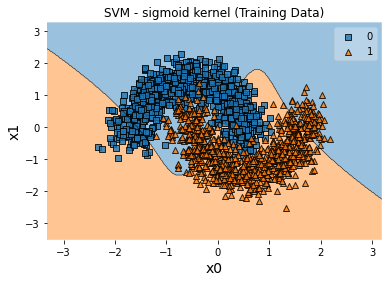

In [95]:
plot_decision_regions(X_train_scaled, y_train, clf = model4)
plt.xlabel("x0", fontsize = 14)
plt.ylabel("x1", fontsize = 14)
plt.title('SVM - sigmoid kernel (Training Data)');

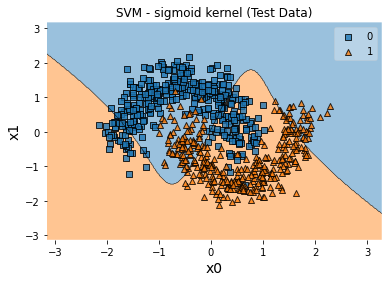

In [96]:
plot_decision_regions(X_test_scaled, y_test, clf = model4)
plt.xlabel("x0", fontsize = 14)
plt.ylabel("x1", fontsize = 14)
plt.title('SVM - sigmoid kernel (Test Data)');


Not the best model. The decision boundaries do not seperate the classes enough.

We created SVM classifier models and investigate the effect of hyper-parameters C,  $\gamma$, and kernels on the model performance. Overall, the poly, rbf, and linear models created the best decision boundaries to seperate the classes.  